## Goals
In this notebook I will review my learning by implementing an Univariate (single input variable) Linear Regression Model.

Following consepts will be exploded:
1. Model Representation
2. Cost Function
3. Gradient Descent

# Problem Statement
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

Our objective is to create a model for housing price prediction.  
I will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |


# 1. Model Representation

## Notation
Here is a summary of some of the notation we will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars)).  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight,                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Tools
First of all we will need to import two of the important libraries: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
%matplotlib widget

### Variable definition

x_train is the input variable <br>
y_train is the output variable - what we expect our model will predict

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300 500]


m is the number of training examples

In [3]:
m = x_train.shape[0]

print(f"m = {m}")

m = 2


We will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

In [4]:
i = 0

x_i = x_train[i]
y_i = y_train[i]

print(f"x_i = {x_i}")
print(f"y_i = {y_i}")

x_i = 1.0
y_i = 300


### Plotting the data

The variable "marker" represents how the point will be plot on the graph <br>
The variable "c" represents what the color of the marker will be

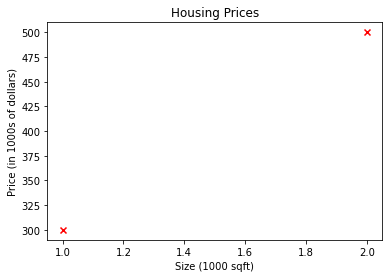

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> <br/> 

w is also known as the weight that, in our linear function, represents the angular coefficient <br>
b is also known as the bias that, in our linear fucntion, represents the quota

Let's start with $w = 100$ and $b = 100$.

In [6]:
w=100
b=100

print(f"w = {w}")
print(f"b = {b}")

w = 100
b = 100


Given w and b, we now want to plot our model function (that hasn't been trained yet). <br>
Let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points.

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

In [7]:
def compute_model_output(x, w, b):
    i = 0
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Our objective is now to call the compute_model_output to define the coordinates of our model function using the weight and bias values previously defined

In [8]:
f_wb = compute_model_output(x_train, w, b)

Let's now plot the model function

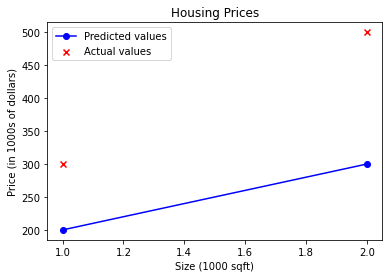

In [9]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual values')
plt.plot(x_train, f_wb, marker='o', c='b', label='Predicted values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Our model is not aligned with the actual prices, let's try to modify the parameters for w and b. <br>

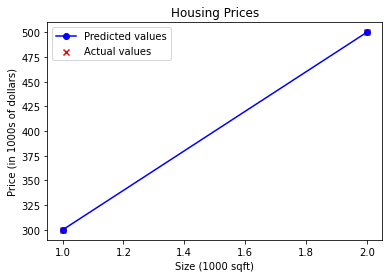

In [10]:
w = 200
b = 100

f_wb = compute_model_output(x_train, w, b)

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual values')
plt.plot(x_train, f_wb, marker='o', c='b', label='Predicted values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Let's also try to predict the price of an house that has 1500 sqft

### Preditction

In [11]:
cost_1500sqft = w * 1.5 + b

print(f"The predicted price for an house of 1500sqft is ${cost_1500sqft}k")

The predicted price for an house of 1500sqft is $400.0k


# 1. Cost Function

## Computing Cost

Computing Cost is the process of defining how well the modelu function is able to predict values.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, we divide the result by m to get an average and by 2 to avoid a result too big.


Let's now build the compute_cost function that will calculate the cost by looping each example. In each loop we will calculate:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [12]:
def compute_cost(x, y, w, b):
    
    # let's define the size of our training example
    m = x.shape[0]
    i = 0
    
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2
        
    total_cost = total_cost * (1/(2 * m))
    
    return total_cost

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> Our goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

<br/>
Below, we can use the slider control to select the value of $w$ that minimizes cost.

In [15]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

## Cost Function Visualization- 3D

Let's assume we have a larger dataset, let's see how we can have a 3D plot of the cost function

### Larger Data Set

In [20]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [22]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
soup_bowl()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …